In [1]:
import pandas as pd

In [2]:
dataFrame = pd.read_excel("bisiklet_fiyatlari.xlsx")

In [3]:
dataFrame.head()

,Fiyat,BisikletOzellik1,BisikletOzellik2
0,807.673876,1749.628226,1749.590668
1,959.227520,1748.007826,1751.824206
2,718.020033,1750.122967,1747.977026
3,945.668885,1749.916440,1750.771646
4,955.542968,1750.780519,1750.592430


In [4]:
import seaborn as sbn
import matplotlib.pyplot as plt

C:\Users\Buse\AppData\Roaming\Python\Python38\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


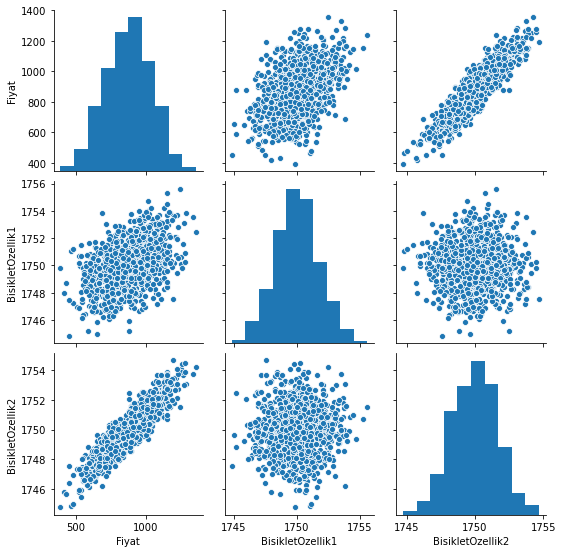

In [5]:
sbn.pairplot(dataFrame)

## veriyi test/train olarak ikiye bölmek

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
#train_test_split

In [8]:
y = dataFrame["Fiyat"].values

x = dataFrame[["BisikletOzellik1","BisikletOzellik2"]].values

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=15)

In [9]:
x_train.shape

(670, 2)

In [10]:
x_test.shape

(330, 2)

In [11]:
y_train.shape

(670,)

In [12]:
y_test.shape

(330,)

### scaling

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler()

In [15]:
scaler.fit(x_train)

MinMaxScaler()

In [16]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [17]:
x_train

array([[0.3177906 , 0.64341466],
       [0.61991638, 0.89583174],
       [0.53950097, 0.0980286 ],
       ...,
       [0.2352117 , 0.52644765],
       [0.7576794 , 0.19157421],
       [0.4292982 , 0.16530301]])

In [18]:
import tensorflow as tf

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [20]:
model = Sequential()

model.add(Dense(4, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(4, activation="relu"))

model.add(Dense(1))

model.compile(optimizer="rmsprop", loss = "mse")

In [21]:
model.fit(x_train, y_train, epochs=250)

Epoch 1/250
21/21 [==============================] - 0s 898us/step - loss: 795587.0000
Epoch 2/250
21/21 [==============================] - 0s 1ms/step - loss: 795353.3750
Epoch 3/250
21/21 [==============================] - 0s 793us/step - loss: 795131.6250
Epoch 4/250
21/21 [==============================] - 0s 2ms/step - loss: 794906.5000
Epoch 5/250
21/21 [==============================] - 0s 1ms/step - loss: 794666.2500
Epoch 6/250
21/21 [==============================] - 0s 699us/step - loss: 794405.9375
Epoch 7/250
21/21 [==============================] - 0s 950us/step - loss: 794123.8750
Epoch 8/250
21/21 [==============================] - 0s 854us/step - loss: 793816.9375
Epoch 9/250
21/21 [==============================] - 0s 808us/step - loss: 793486.8125
Epoch 10/250
21/21 [==============================] - 0s 950us/step - loss: 793130.1875
Epoch 11/250
21/21 [==============================] - 0s 914us/step - loss: 792745.8125
Epoch 12/250
21/21 [===========================

21/21 [==============================] - 0s 807us/step - loss: 408352.7500
Epoch 95/250
21/21 [==============================] - 0s 712us/step - loss: 396966.9375
Epoch 96/250
21/21 [==============================] - 0s 807us/step - loss: 385349.2188
Epoch 97/250
21/21 [==============================] - 0s 711us/step - loss: 373708.5625
Epoch 98/250
21/21 [==============================] - 0s 665us/step - loss: 361969.0938
Epoch 99/250
21/21 [==============================] - 0s 665us/step - loss: 350069.5938
Epoch 100/250
21/21 [==============================] - 0s 997us/step - loss: 338075.2812
Epoch 101/250
21/21 [==============================] - 0s 807us/step - loss: 326062.6250
Epoch 102/250
21/21 [==============================] - 0s 712us/step - loss: 313847.9375
Epoch 103/250
21/21 [==============================] - 0s 665us/step - loss: 301690.7500
Epoch 104/250
21/21 [==============================] - 0s 712us/step - loss: 289437.4062
Epoch 105/250
21/21 [===================

21/21 [==============================] - 0s 902us/step - loss: 2717.0210
Epoch 188/250
21/21 [==============================] - 0s 855us/step - loss: 2665.3247
Epoch 189/250
21/21 [==============================] - 0s 855us/step - loss: 2610.6538
Epoch 190/250
21/21 [==============================] - 0s 665us/step - loss: 2551.7900
Epoch 191/250
21/21 [==============================] - 0s 760us/step - loss: 2497.7742
Epoch 192/250
21/21 [==============================] - 0s 665us/step - loss: 2439.4661
Epoch 193/250
21/21 [==============================] - 0s 665us/step - loss: 2389.4231
Epoch 194/250
21/21 [==============================] - 0s 617us/step - loss: 2336.0063
Epoch 195/250
21/21 [==============================] - 0s 665us/step - loss: 2290.5481
Epoch 196/250
21/21 [==============================] - 0s 665us/step - loss: 2231.6736
Epoch 197/250
21/21 [==============================] - 0s 712us/step - loss: 2182.6438
Epoch 198/250
21/21 [==============================] - 0s

In [22]:
loss = model.history.history["loss"]

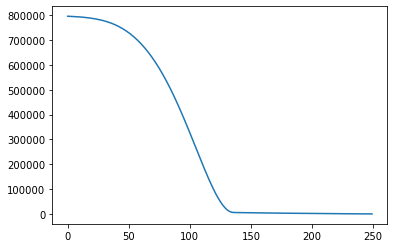

In [23]:
sbn.lineplot(x=range(len(loss)),y=loss)

In [24]:
trainLoss = model.evaluate(x_train,y_train,verbose=0)

In [25]:
testLoss= model.evaluate(x_test, y_test, verbose=0)

In [26]:
trainLoss

320.21807861328125

In [27]:
testLoss

309.10650634765625

In [28]:
testGuess=model.predict(x_test)

In [29]:
testGuess

array([[1061.9203 ],
       [ 650.06396],
       [ 878.78296],
       [ 896.5211 ],
       [ 901.5084 ],
       [ 495.90704],
       [ 929.162  ],
       [ 984.0624 ],
       [ 937.09625],
       [1006.70624],
       [ 765.2412 ],
       [ 916.05817],
       [ 944.6484 ],
       [1040.7803 ],
       [1100.5437 ],
       [ 702.9876 ],
       [1107.5148 ],
       [ 676.19324],
       [1132.739  ],
       [ 888.3006 ],
       [ 894.2591 ],
       [ 733.714  ],
       [ 497.82642],
       [ 640.8359 ],
       [ 841.25433],
       [1073.6145 ],
       [ 732.2057 ],
       [ 771.3497 ],
       [ 877.3352 ],
       [ 783.73096],
       [ 494.45242],
       [ 794.1779 ],
       [ 745.18555],
       [ 671.73846],
       [ 888.9794 ],
       [ 849.9747 ],
       [1023.5809 ],
       [1012.8903 ],
       [ 850.4721 ],
       [ 866.8915 ],
       [ 771.0544 ],
       [1150.3715 ],
       [1079.9204 ],
       [1070.8663 ],
       [ 875.2718 ],
       [ 625.57904],
       [1124.8887 ],
       [ 967.

In [30]:
guessDf = pd.DataFrame(y_test, columns=["Gerçek Y"])

In [31]:
guessDf

,Gerçek Y
0,1081.652164
1,622.675990
2,889.356810
3,902.826733
4,897.662404
...,...
325,1028.438035
326,789.934950
327,758.490486
328,1172.871659


In [32]:
testGuess = pd.Series(testGuess.reshape(330,))

In [33]:
testGuess

0      1061.920288
1       650.063965
2       878.782959
3       896.521118
4       901.508423
          ...     
325    1003.422302
326     802.469727
327     778.739929
328    1143.004272
329     813.697754
Length: 330, dtype: float32

In [34]:
guessDf = pd.concat([guessDf,testGuess],axis=1)

In [35]:
guessDf

,Gerçek Y,0
0,1081.652164,1061.920288
1,622.675990,650.063965
2,889.356810,878.782959
3,902.826733,896.521118
4,897.662404,901.508423
...,...,...
325,1028.438035,1003.422302
326,789.934950,802.469727
327,758.490486,778.739929
328,1172.871659,1143.004272


In [36]:
guessDf.columns = ["Gerçek Y", "Tahmin Y"]

In [37]:
guessDf

,Gerçek Y,Tahmin Y
0,1081.652164,1061.920288
1,622.675990,650.063965
2,889.356810,878.782959
3,902.826733,896.521118
4,897.662404,901.508423
...,...,...
325,1028.438035,1003.422302
326,789.934950,802.469727
327,758.490486,778.739929
328,1172.871659,1143.004272


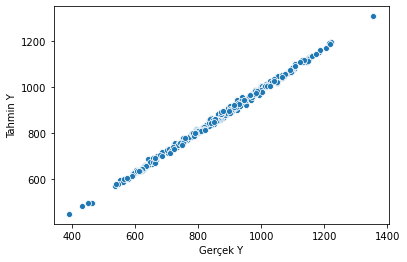

In [38]:
sbn.scatterplot(x = "Gerçek Y", y = "Tahmin Y", data=guessDf)

In [41]:
from sklearn.metrics import mean_squared_error , mean_absolute_error

In [42]:
mean_absolute_error(guessDf["Gerçek Y"], guessDf["Tahmin Y"])

14.16636993947088

In [43]:
mean_squared_error(guessDf["Gerçek Y"], guessDf["Tahmin Y"])

309.10645285226076

In [44]:
dataFrame.describe()

,Fiyat,BisikletOzellik1,BisikletOzellik2
count,1000.000000,1000.000000,1000.000000
mean,872.677801,1750.024800,1749.964733
std,164.124504,1.704531,1.659578
min,390.856887,1744.852108,1744.742389
25%,757.795031,1748.831119,1748.803186
50%,879.168705,1750.017350,1750.003926
75%,988.612778,1751.115766,1751.129414
max,1355.213745,1755.613884,1754.666038


In [48]:
newAttr=[[1753,1751]]

In [49]:
newAttr = scaler.transform(newAttr)

In [50]:
model.predict(newAttr)

array([[1065.8469]], dtype=float32)

In [51]:
from tensorflow.keras.models import load_model

In [56]:
model.save("bisiklet_modeli.h5")

In [57]:
finallyModel= load_model("bisiklet_modeli.h5")

In [58]:
finallyModel.predict(newAttr)

array([[1065.8469]], dtype=float32)